# **Exploratory Data Analysis (EDA) untuk Memahami Dinamika Pengangguran di Jawa Barat**

#**Kelompok 7**
1. Muhammad Daffa  Ma'arif (2305771)
2. Klara Ollivviera Augustine Gunawan (2306205)
3. Nashwa Nadria Futi (2308130)
4. Narendra Ridha Baihaqi (2308882)
5. Hafidz Tantowi (2308817)

# Pendahuluan



Pengangguran merupakan salah satu isu sosial dan ekonomi yang krusial di Indonesia, terutama di provinsi-provinsi dengan tingkat populasi tinggi seperti Jawa Barat. Sebagai provinsi dengan jumlah penduduk terbesar di Indonesia, Jawa Barat menghadapi tantangan yang kompleks dalam hal penyediaan lapangan kerja yang cukup untuk menampung angkatan kerja yang terus berkembang. Tingkat pengangguran yang tinggi dapat menjadi indikator adanya masalah struktural dalam perekonomian, ketidakcocokan antara keterampilan tenaga kerja dengan kebutuhan pasar, atau terbatasnya akses ke peluang kerja yang layak.

Dalam rangka memahami lebih dalam mengenai kondisi pengangguran di Jawa Barat, Exploratory Data Analysis (EDA) menjadi pendekatan yang penting. EDA merupakan langkah awal dalam analisis data yang bertujuan untuk mengeksplorasi dan memahami pola, tren, serta karakteristik data sebelum melakukan analisis yang lebih mendalam atau pengambilan keputusan. Melalui EDA, kita dapat menggali informasi penting dari data pengangguran di Jawa Barat, seperti distribusi tingkat pengangguran per kabupaten/kota, tren perubahan tingkat pengangguran dari waktu ke waktu, hingga hubungan antara pengangguran dengan variabel-variabel lain seperti tingkat pendidikan, usia, atau sektor industri.

Dengan menggunakan teknik visualisasi data, pengukuran statistik deskriptif, dan analisis korelasi, EDA membantu kita mengidentifikasi insight yang dapat digunakan sebagai dasar untuk merumuskan kebijakan atau intervensi yang lebih tepat sasaran dalam mengurangi pengangguran di Jawa Barat. Analisis ini juga akan memberikan gambaran awal mengenai kondisi sosial-ekonomi di provinsi ini, yang dapat menjadi landasan untuk penelitian lebih lanjut atau pembuatan model prediktif di masa mendatang.

# Pertanyaan



1. Bagaimana keterkaitan antara tingkat pendidikan dengan tingkat pengangguran?
2. Lulusan pendidikan mana yang memiliki tingkat pengangguran tertinggi?
3. Bagaimana perbedaan antara jenis kelamin dengan tingkat pengangguran?
4. Bagaimana tren tingkat pengangguran pada tahun 2014 - 2023, apakah ada variabel kuat yang mempengaruhinya?
5. Bagaimana distribusi pengangguran berdasarkan golongan umur, apakah merata atau menitik berat di suatu golongan?
6. Wilayah mana yang mengalami peningkatan pengangguran paling signifikan akibat COVID-19?
7. Apakah terdapat keterkaitan antara pengangguran dan kemiskinan di suatu wilayah?
8. Apakah terdapat perbedaan tingkat pengangguran antara daerah yang kecil dan kurang padat dibandingkan dengan daerah yang padat penduduk?
9. Apakah ada jenis kelamin yang lebih terpengaruh oleh pandemi COVID-19 dalam hal pengangguran?
10. Sektor pekerjaan apa yang paling banyak dan paling sedikit menyerap lapangan kerja?
11. Bagaimana korelasi antara jumlah pengangguran, penduduk miskin, penduduk bekerja, angkatan kerja, dan partisipasi angkatan kerja?

# **Praproses**

In [870]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings as warn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

warn.simplefilter(action='ignore', category=FutureWarning)

## **Load dataset**

In [871]:
tpt = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/bps-od_17044_tingkat_pengangguran_terbuka__kabupatenkota_v3_data.csv')
jptp = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_19869_jml_pengangguran_terbuka__pendidikan_kabupatenkota_v1_data.csv')
ppm = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/bps-od_17058_persentase_penduduk_miskin__kabupatenkota_v2_data.csv')
jpp = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disdukcapil_2-od_15131_jumlah_penduduk_berdasarkan_jenis_pekerjaan_v3_data.csv')
jptu = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_15805_jml_pengangguran_terbuka__golongan_umur_v1.csv')
jpt = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_15806_jml_pengangguran_terbuka__jk_v1_data.csv')
jpbjk = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_15790_jml_penduduk_bekerja__jk_v1_data.csv')
jpbk = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_15793_jml_penduduk_bekerja__kabupatenkota_v1_data.csv')
jpup = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disdukcapil_2-od_17001_jml_penduduk_usia_produktif_15__64_thn__jk_v1_data.csv')
jpjk = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disdukcapil_2-od_17892_jml_penduduk__jk_kabupatenkota_data.csv')
ppak = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Kelompok-7---Data-Mining/refs/heads/main/bps-od_20126_persentase_tingkat_partisipasi_angkatan_kerja_data.csv')
jak = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Kelompok-7---Data-Mining/refs/heads/main/disnakertrans-od_15772_jumlah_angkatan_kerja_berdasarkan_daerah_v1_data.csv')


## **Membuat array untuk dataset**

untuk memudahkan praproses, karena dataset yang dipakai cukup banyak sehingga tidak memungkinkan untuk memproses tiap dataset secara keseluruhan (proses yang terlalu panjang)



In [872]:
datasets = {'TPT': tpt,'JPTP': jptp,'PPM': ppm,'JPP': jpp,'JPTU': jptu,'JPT': jpt, 'JPBJK' : jpbjk, 'JPBK' : jpbk, 'JPUP' : jpup, 'JPJK' : jpjk, 'PPAK' : ppak, 'JAK' : jak}

for name, data in datasets.items():
    print(f"=== {name} ===")
    data.info()
    print("\n")

=== TPT ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            397 non-null    int64  
 1   kode_provinsi                 397 non-null    int64  
 2   nama_provinsi                 397 non-null    object 
 3   kode_kabupaten_kota           397 non-null    int64  
 4   nama_kabupaten_kota           397 non-null    object 
 5   tingkat_pengangguran_terbuka  397 non-null    float64
 6   satuan                        397 non-null    object 
 7   tahun                         397 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 24.9+ KB


=== JPTP ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id   

## **Menyesuaikan nama Field**


mengubah kolom 'tingkat_penganggur_terbuka' menjadi 'persentase_penganggur_terbuka' agar lebih mudah dipahami


In [873]:
# mengganti nama kolom tingkat_penganggur_terbuka pada dataset tpt menjadi persentase_penganggur_terbuka
datasets['TPT'].rename(columns = {'tingkat_pengangguran_terbuka':'persentase_penganggur_terbuka'}, inplace = True)
datasets['JPP'].rename(columns = {'jumlah_penduduk':'jumlah_penduduk_bekerja'}, inplace = True)
datasets['JPBJK'].rename(columns = {'jumlah_penduduk':'jumlah_penduduk_bekerja'}, inplace = True)
datasets['JPBK'].rename(columns = {'jumlah_penduduk':'jumlah_penduduk_bekerja'}, inplace = True)
datasets['JPUP'].rename(columns = {'jumlah_penduduk':'jumlah_penduduk_usia_produktif'}, inplace = True)

## **Membuang Field yang dianggap tidak perlu**

### **field nama, kode provinsi, dan satuan**



Kolom nama dan kode provinsi dianggap tidak diperlukan, karena analisis yang dilakukan mencakup seluruh provinsi jawa barat, tidak diluar provinsi tersebut, sehingga data tidak memerlukan identitas wilayah provinsi

kolom satuan dianggap tidak perlu karena isinya adalah sama, yaitu jiwa atau orang, mengecualikan persentase pada dataset 'TPT' karena sudah dicantumkan pada nama kolom dari data yang diperlukan

In [874]:
# Buang kolom "kode_provinsi", "nama_provinsi" dan "satuan" jika ada
for name, data in datasets.items():
    if "kode_provinsi" in data.columns and "nama_provinsi" in data.columns and "satuan" in data.columns:
        datasets[name] = data.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

### **field id dan kode kabupaten**

field id dan kode kabupaten ini tidak kami gunakan saat processing dan visualisasi data, sehingga kami memutuskan untuk menghapusnya saja, agar field lain lebih mudah diamati

In [875]:
# Buang kolom "id" dan "kode kabupaten" jika ada
for name, data in datasets.items():
    if "kode_kabupaten_kota" in data.columns and "id" in data.columns:
        datasets[name] = data.drop(columns=["kode_kabupaten_kota", "id"])

## **Filter data**



Membuang data yang tidak diperlukan, kami hanya mengambil data pada rentang tahun 2014 - 2023

In [876]:
# filter data dalam rentang 2014 - 2023
for name, data in datasets.items():
  datasets[name] = datasets[name][(datasets[name]['tahun'] >= 2014) & (datasets[name]['tahun'] <= 2023)]

## **Penanganan null dan zero value pada tiap dataset**

ada beberapa dataset yang memiliki null dan zero value, sehingga diperlukan penanganan untuk anomali tersebut

### **null value check**

In [877]:
# mengecek jika ada nilai kolom yang null
for name, data in datasets.items():
  print(f"=== {name} ===")
  print(datasets[name].isnull().sum())
  print("\n")

=== TPT ===
nama_kabupaten_kota              0
persentase_penganggur_terbuka    0
tahun                            0
dtype: int64


=== JPTP ===
nama_kabupaten_kota    0
pendidikan             0
jumlah_pengangguran    1
tahun                  0
dtype: int64


=== PPM ===
nama_kabupaten_kota           0
persentase_penduduk_miskin    0
tahun                         0
dtype: int64


=== JPP ===
id                         0
jenis_pekerjaan            0
jenis_kelamin              0
jumlah_penduduk_bekerja    0
tahun                      0
dtype: int64


=== JPTU ===
id                             0
golongan_umur                  0
jumlah_pengangguran_terbuka    0
tahun                          0
dtype: int64


=== JPT ===
id                             0
jenis_kelamin                  0
jumlah_pengangguran_terbuka    0
tahun                          0
dtype: int64


=== JPBJK ===
id                         0
jenis_kelamin              0
jumlah_penduduk_bekerja    0
tahun                    

Terdapat null value pada kolom jumlah pengangguran di dataframe JPTP

### **zero value check**

In [878]:
for name, data in datasets.items():
    print(f"Dataset: {name}")
    print((data == 0).sum())  # Menampilkan jumlah nilai 0 di setiap kolom
    print("Baris dengan nilai 0:\n", data[(data == 0).any(axis=1)])
    print("\n")

Dataset: TPT
nama_kabupaten_kota              0
persentase_penganggur_terbuka    0
tahun                            0
dtype: int64
Baris dengan nilai 0:
 Empty DataFrame
Columns: [nama_kabupaten_kota, persentase_penganggur_terbuka, tahun]
Index: []


Dataset: JPTP
nama_kabupaten_kota     0
pendidikan              0
jumlah_pengangguran    36
tahun                   0
dtype: int64
Baris dengan nilai 0:
           nama_kabupaten_kota  \
360        KABUPATEN SUKABUMI   
370         KABUPATEN BANDUNG   
380     KABUPATEN TASIKMALAYA   
381          KABUPATEN CIAMIS   
425        KABUPATEN KARAWANG   
431   KABUPATEN BANDUNG BARAT   
436     KABUPATEN PANGANDARAN   
437     KABUPATEN PANGANDARAN   
438     KABUPATEN PANGANDARAN   
439     KABUPATEN PANGANDARAN   
440     KABUPATEN PANGANDARAN   
461               KOTA BEKASI   
485               KOTA BANJAR   
516          KABUPATEN CIAMIS   
531      KABUPATEN MAJALENGKA   
535      KABUPATEN MAJALENGKA   
581             KOTA SUKABUMI   
6

Terdapat beberapa zero value, akan kami ubah menjadi nilai rata ratanya untuk jumlah pengangguran berdasarkan pendidikan, dan persentase penduduk miskin, sedangkan jumlah penduduk bekerja dibiarkan, karena masih masuk akal

### **Isi nilai null & zero values dengan rata rata**

In [879]:
# Mengganti nilai 0 di kolom `jumlah_pengangguran` dengan nilai rata-rata dari kolom tersebut
datasets['JPTP'].loc[datasets['JPTP']['jumlah_pengangguran'] == 0, 'jumlah_pengangguran'] = np.nan
datasets['JPTP']['jumlah_pengangguran'] = datasets['JPTP']['jumlah_pengangguran'].fillna(datasets['JPTP']['jumlah_pengangguran'].mean())

# Mengganti nilai 0 di kolom `persentase_penduduk_miskin` dengan nilai rata-rata dari kolom tersebut
datasets['PPM'].loc[datasets['PPM']['persentase_penduduk_miskin'] == 0, 'persentase_penduduk_miskin'] = np.nan
datasets['PPM']['persentase_penduduk_miskin'] = datasets['PPM']['persentase_penduduk_miskin'].fillna(datasets['PPM']['persentase_penduduk_miskin'].mean())

## **Ubah tipe data yg tidak sesuai**

### tipe data double pada field jumlah

field Jumlah_pengangguran pada dataset JPTP memiliki tipe data double, padahal satuannya adalah jiwa/orang, sehingga perlu diubah ke integer

In [880]:
# mengubah tipe data jumlah_pengangguran pada dataset jptp agar sesuai
datasets['JPTP']['jumlah_pengangguran'] = pd.to_numeric(datasets['JPTP']['jumlah_pengangguran'], errors='coerce').astype(int)

### tipe data integer pada field tahun

Field Tahun pada seluruh dataset memiliki tipe data Integer, agar lebih mudah dikenali saat melakukan Plotting, membantu library plotting (seperti seaborn atau matplotlib) menampilkan tahun secara lebih jelas sebagai kategori

In [881]:
for name, data in datasets.items():
  if 'tahun' in data.columns:
    datasets[name]['tahun'] = datasets[name]['tahun'].astype(str)

### **Penanganan anomali lainnya**

## **Penambahan secara manual data yang kurang atau tidak ada**

ada beberapa dataset atau dataframe yang memiliki data tidak lengkap, sehingga perlu dilakukan pengisian data manual yang sesuai dengan faktanya atau berasal dari sumber yang legal

### **data persentase pengangguran terbuka kabupaten pangandaran pada tahun 2014 berdasarkan sumber legal**

Pada dataset TPT, tidak ada data persentase penganguran terbuka untuk kabupaten pangandaran, sehingga kami memasukkan data persentasenya secara manual (1.52 %), dan nilai tersebut diadapatkan dari sumber yang legal

In [882]:
# Data baru untuk Pangandaran tahun 2014
data_baru = pd.DataFrame({
    'nama_kabupaten_kota': ['KABUPATEN PANGANDARAN'],
    'persentase_penganggur_terbuka': [1.52],
    'tahun': ['2014']
})

# Menambahkan data baru ke dataset asli
datasets['TPT'] = pd.concat([datasets['TPT'], data_baru], ignore_index=True)

### **data jumlah penduduk bekerja tiap kabupaten pada tahun 2016 berdasarkan nilai mean**

pada dataset JPBK, dimana berisi data jumlah penduduk bekerja tiap kabupaten, ada data yang tidak ada, yaitu data seluruh kabupaten pada tahun 2016.

sehingga kami memutuskan untuk menambahkan data baru untuk tahun 2016 pada tiap kabupaten dengan nilai rata-rata dari keseluruhan jumlah penduduk bekerja dari tahun 2014 - 2023 kecuali tahun 2016 karena memang tidak ada datanya.

In [883]:
# Hitung rata-rata jumlah penduduk bekerja per kabupaten
rata_rata = datasets['JPBK'].groupby('nama_kabupaten_kota')['jumlah_penduduk_bekerja'].mean().reset_index()

# Buat entri untuk tahun 2016 menggunakan rata-rata
rata_rata['tahun'] = '2016'
rata_rata.columns = ['nama_kabupaten_kota', 'jumlah_penduduk_bekerja', 'tahun']

# Tambahkan entri tahun 2016 ke dataset asli
datasets['JPBK'] = pd.concat([datasets['JPBK'], rata_rata], ignore_index=True)

tampilkan hasilnya untuk melihat apakah data sudah ditambahkan

In [884]:
datasets['JPBK'].tail()

,nama_kabupaten_kota,jumlah_penduduk_bekerja,tahun
264,KOTA CIMAHI,2.663447e+05,2016
265,KOTA CIREBON,1.424802e+05,2016
266,KOTA DEPOK,1.023680e+06,2016
267,KOTA SUKABUMI,1.348574e+05,2016
268,KOTA TASIKMALAYA,3.062170e+05,2016


## **Normalization**

Beberapa dataset perlu untuk dinormalisasi terlebih dahulu sebelum diproses atau divisualisasikan plotnya

### **Data Persentase penduduk bekerja tiap kabupaten**

Data persentase penduduk bekerja tiap kabupaten per tahun diperlukan untuk heatmap korelasi dengan dataframe lain, menggunakan dataset JPBK yang berisi jumlah penduduk bekerja (satuan jiwa) yang dibandingkan dengan keseluruhan jumlah penduduk di tiap kabupaten (dataset JPJK)

pertama, kami menggabungkan terlebih dahulu kedua dataframe tersebut

In [885]:
# Menggabungkan jumlah penduduk laki-laki dan perempuan setiap tahun per kabupaten/kota
jpjk_total_per_tahun = datasets['JPJK'].groupby(['nama_kabupaten_kota', 'tahun'])['jumlah_penduduk'].sum().reset_index()

# Menggabungkan data rata-rata penduduk bekerja dengan data total penduduk per tahun
Persentase_penduduk_bekerja = pd.merge(jpjk_total_per_tahun, datasets['JPBK'], on=['nama_kabupaten_kota', 'tahun'])

Persentase_penduduk_bekerja[['nama_kabupaten_kota', 'tahun', 'jumlah_penduduk', 'jumlah_penduduk_bekerja']]

,nama_kabupaten_kota,tahun,jumlah_penduduk,jumlah_penduduk_bekerja
0,KABUPATEN BANDUNG,2014,3492356,1.490031e+06
1,KABUPATEN BANDUNG,2015,3494469,1.438365e+06
2,KABUPATEN BANDUNG,2016,3512189,1.606498e+06
3,KABUPATEN BANDUNG,2017,3525149,1.584391e+06
4,KABUPATEN BANDUNG,2018,3535992,1.575661e+06
...,...,...,...,...
264,KOTA TASIKMALAYA,2019,719882,3.010810e+05
265,KOTA TASIKMALAYA,2020,725561,3.158440e+05
266,KOTA TASIKMALAYA,2021,731606,3.163490e+05
267,KOTA TASIKMALAYA,2022,746710,3.240990e+05


Lalu, menghitung persentase penduduk bekerja

In [886]:
# Menghitung persentase penduduk yang bekerja
Persentase_penduduk_bekerja['persentase_bekerja'] = (Persentase_penduduk_bekerja['jumlah_penduduk_bekerja'] / Persentase_penduduk_bekerja['jumlah_penduduk']) * 100

# Menampilkan hasil
Persentase_penduduk_bekerja[['nama_kabupaten_kota', 'tahun', 'persentase_bekerja']]

,nama_kabupaten_kota,tahun,persentase_bekerja
0,KABUPATEN BANDUNG,2014,42.665496
1,KABUPATEN BANDUNG,2015,41.161189
2,KABUPATEN BANDUNG,2016,45.740657
3,KABUPATEN BANDUNG,2017,44.945363
4,KABUPATEN BANDUNG,2018,44.560649
...,...,...,...
264,KOTA TASIKMALAYA,2019,41.823660
265,KOTA TASIKMALAYA,2020,43.531006
266,KOTA TASIKMALAYA,2021,43.240351
267,KOTA TASIKMALAYA,2022,43.403597


### **Persentase angkatan kerja**

persentase angkatan kerja diperlukan untuk korelasi dengan variabel lain, dari dataset ppak, yang berisi jumlah angkatan kerja, kami perlu menormalisasikannya terlebih dahulu dengan membaginya dengan total penduduk di jawa barat

In [887]:
# Hitung total angkatan kerja per tahun
total_angkatan_kerja_per_tahun = jak.groupby(['tahun'])['jumlah_angkatan_kerja'].sum().reset_index()

# Hitung total penduduk per tahun
total_penduduk_per_tahun = datasets['JPJK'].groupby(['tahun'])['jumlah_penduduk'].sum().reset_index()

# Pastikan kolom 'tahun' pada kedua dataframe bertipe yang sama, misalnya int
total_angkatan_kerja_per_tahun['tahun'] = total_angkatan_kerja_per_tahun['tahun'].astype(int)
total_penduduk_per_tahun['tahun'] = total_penduduk_per_tahun['tahun'].astype(int)

# Gabungkan data total angkatan kerja dengan total penduduk
persentase_ak = pd.merge(total_angkatan_kerja_per_tahun, total_penduduk_per_tahun, on='tahun', how='left')

# Hitung persentase angkatan kerja
persentase_ak['persentase_angkatan_kerja'] = (persentase_ak['jumlah_angkatan_kerja'] / persentase_ak['jumlah_penduduk']) * 100

## **Penanganan anomali lainnya**

Pada dataset JPP (jumlah penduduk berdasarkan jenis pekerjaan), terdapat isi field yang serupa namun berbeda penamaannya, yaitu pada field jenis pekerjaan ada data 'BELUM / TIDAK BEKERJA' dan 'BELUM/TIDAK BEKERJA', sehingga membuat data tidak konsisten dan perlunya penggabungan kedua jenis tersebut

In [888]:
# Memeriksa apakah nilai di kolom 'jenis_pekerjaan' adalah 'BELUM / TIDAK BEKERJA' atau 'BELUM/TIDAK BEKERJA'
mask = (datasets['JPP']['jenis_pekerjaan'] == 'BELUM / TIDAK BEKERJA') | (datasets['JPP']['jenis_pekerjaan'] == 'BELUM/TIDAK BEKERJA')

# Menampilkan baris yang sesuai dengan kondisi
print(datasets['JPP'][mask])

      id        jenis_pekerjaan jenis_kelamin  jumlah_penduduk_bekerja tahun
0      1    BELUM/TIDAK BEKERJA     LAKI-LAKI                  5241582  2014
1      2    BELUM/TIDAK BEKERJA     PEREMPUAN                  4607170  2014
178  179    BELUM/TIDAK BEKERJA     LAKI-LAKI                  5789236  2015
267  268    BELUM/TIDAK BEKERJA     PEREMPUAN                  5110515  2015
356  357    BELUM/TIDAK BEKERJA     LAKI-LAKI                  5473290  2018
357  358    BELUM/TIDAK BEKERJA     PEREMPUAN                  4740432  2018
534  535    BELUM/TIDAK BEKERJA     LAKI-LAKI                  5932223  2020
535  536    BELUM/TIDAK BEKERJA     PEREMPUAN                  5131782  2020
708  709  BELUM / TIDAK BEKERJA     LAKI-LAKI                   170273  2023
709  710  BELUM / TIDAK BEKERJA     PEREMPUAN                   115681  2023


### **standarisasi penamaan jenis peerjaan**

ada 2 jenis pekerjaan yang penamaan nya berbeda, padahal isinya samam sehingga perlu distandarisasi

In [889]:
# 1. Standarkan penamaan jenis pekerjaan agar konsisten
jpp['jenis_pekerjaan'] = jpp['jenis_pekerjaan'].replace({'BELUM / TIDAK BEKERJA': 'TIDAK BEKERJA',
                                                         'BELUM/TIDAK BEKERJA': 'TIDAK BEKERJA'})

# 2. Hitung jumlah penduduk berdasarkan jenis pekerjaan, tahun, dan jenis kelamin
# Setelah penamaan konsisten, lakukan pengelompokan untuk mendapatkan jumlah yang sudah tergabung
jpp_updated = jpp.groupby(['jenis_pekerjaan', 'tahun'], as_index=False)['jumlah_penduduk_bekerja'].sum()

# 3. Perbarui dataset lama dengan dataset yang sudah diperbarui
datasets['JPP'] = jpp_updated

# Melihat hasil untuk memverifikasi perubahan
tidak_bekerja_data = jpp_updated[jpp_updated['jenis_pekerjaan'] == 'TIDAK BEKERJA']

# Menampilkan hasil
print(tidak_bekerja_data)

    jenis_pekerjaan  tahun  jumlah_penduduk_bekerja
292   TIDAK BEKERJA   2014                  9848752
293   TIDAK BEKERJA   2015                 10899751
294   TIDAK BEKERJA   2018                 10213722
295   TIDAK BEKERJA   2020                 11064005
296   TIDAK BEKERJA   2023                   285954


### **Update nilai berdasarkan sumber terpercaya**

update nilai penduduk bekerja untuk jenis 'tidak bekerja' dengan menghitung manual dari persentase tidak bekerja pada tahun tersebut dan jumlah penduduk di tahun tsb, dari sumber legal, didapat hasil 3.711.825 jiwa

In [890]:
# ubah nilai penduduk di tahun 2023
datasets['JPP'].loc[(datasets['JPP']['tahun'] == 2023), 'jumlah_penduduk_bekerja'] = 3711815

# update dataset
tidak_bekerja_data = jpp_updated[jpp_updated['jenis_pekerjaan'] == 'TIDAK BEKERJA']

# cek hasil
print(tidak_bekerja_data)

    jenis_pekerjaan  tahun  jumlah_penduduk_bekerja
292   TIDAK BEKERJA   2014                  9848752
293   TIDAK BEKERJA   2015                 10899751
294   TIDAK BEKERJA   2018                 10213722
295   TIDAK BEKERJA   2020                 11064005
296   TIDAK BEKERJA   2023                  3711815


# **Data Exploration**

**Menampilkan 5 data pertama pada seluruh dataset**




In [891]:
datasets['TPT'].info()
datasets['TPT'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nama_kabupaten_kota            243 non-null    object 
 1   persentase_penganggur_terbuka  243 non-null    float64
 2   tahun                          243 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.8+ KB


,nama_kabupaten_kota,persentase_penganggur_terbuka,tahun
0,KABUPATEN BOGOR,7.65,2014
1,KABUPATEN SUKABUMI,8.09,2014
2,KABUPATEN CIANJUR,14.87,2014
3,KABUPATEN BANDUNG,8.48,2014
4,KABUPATEN GARUT,7.71,2014


definisi field : Persentase penganggur terbuka adalah ukuran yang menunjukkan proporsi tenaga kerja yang tidak memiliki pekerjaan tetapi sedang aktif mencari pekerjaan. Ini dihitung dengan membagi jumlah penganggur terbuka dengan jumlah angkatan kerja (jumlah orang yang bekerja dan yang sedang mencari pekerjaan), lalu dikalikan dengan 100 untuk mendapatkan persentase.

In [892]:
datasets['JPTP'].info()
datasets['JPTP'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, 351 to 1565
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nama_kabupaten_kota  1215 non-null   object
 1   pendidikan           1215 non-null   object
 2   jumlah_pengangguran  1215 non-null   int64 
 3   tahun                1215 non-null   object
dtypes: int64(1), object(3)
memory usage: 47.5+ KB


,nama_kabupaten_kota,pendidikan,jumlah_pengangguran,tahun
351,KABUPATEN BOGOR,TIDAK/BELUM PERNAH SEKOLAH/TIDAK/BELUM TAMAT SD,6663,2014
352,KABUPATEN BOGOR,SD,48355,2014
353,KABUPATEN BOGOR,SMP,45949,2014
354,KABUPATEN BOGOR,SMA,70136,2014
355,KABUPATEN BOGOR,DIPLOMA I/II/III/AKADEMI/UNIVERSITAS,6119,2014


jumlah pengangguran : jumlah jiwa orang yang menganggur atau tidak bekerja

In [893]:
datasets['PPM'].info()
datasets['PPM'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 108 to 377
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nama_kabupaten_kota         270 non-null    object 
 1   persentase_penduduk_miskin  270 non-null    float64
 2   tahun                       270 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.4+ KB


,nama_kabupaten_kota,persentase_penduduk_miskin,tahun
108,KABUPATEN BOGOR,8.91,2014
109,KABUPATEN SUKABUMI,8.81,2014
110,KABUPATEN CIANJUR,11.47,2014
111,KABUPATEN BANDUNG,7.65,2014
112,KABUPATEN GARUT,12.47,2014


persentase penduduk miskin : persentase penduduk miskin berdasarkan jumlah penduduk di tiap kabupaten

In [894]:
datasets['JPP'].info()
datasets['JPP'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   jenis_pekerjaan          365 non-null    object
 1   tahun                    365 non-null    int64 
 2   jumlah_penduduk_bekerja  365 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


,jenis_pekerjaan,tahun,jumlah_penduduk_bekerja
0,AGAMA DAN KEPERCAYAAN,2023,3711815
1,AKUNTAN,2014,449
2,AKUNTAN,2015,380
3,AKUNTAN,2018,422
4,AKUNTAN,2020,416


jumlah penduduk bekerja : jumlah dalam satuan jiwa

In [895]:
datasets['JPTU'].info()
datasets['JPTU'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 30 to 129
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           100 non-null    int64 
 1   golongan_umur                100 non-null    object
 2   jumlah_pengangguran_terbuka  100 non-null    int64 
 3   tahun                        100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.9+ KB


,id,golongan_umur,jumlah_pengangguran_terbuka,tahun
30,31,15-19,67167,2014
31,32,20-24,502698,2014
32,33,25-29,224118,2014
33,34,30-34,1324,2014
34,35,35-39,6021,2014


jumlah pengangguran terbuka : jumlah penganggur terbuka dalam satuan jiwa

In [896]:
datasets['JPT'].info()
datasets['JPT'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 6 to 25
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           20 non-null     int64 
 1   jenis_kelamin                20 non-null     object
 2   jumlah_pengangguran_terbuka  20 non-null     int64 
 3   tahun                        20 non-null     object
dtypes: int64(2), object(2)
memory usage: 800.0+ bytes


,id,jenis_kelamin,jumlah_pengangguran_terbuka,tahun
6,7,LAKI-LAKI,1129872,2014
7,8,PEREMPUAN,645324,2014
8,9,LAKI-LAKI,1178424,2015
9,10,PEREMPUAN,61645,2015
10,11,LAKI-LAKI,1324843,2016


In [897]:
datasets['JPBJK'].info()
datasets['JPBJK'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 6 to 25
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       20 non-null     int64 
 1   jenis_kelamin            20 non-null     object
 2   jumlah_penduduk_bekerja  20 non-null     int64 
 3   tahun                    20 non-null     object
dtypes: int64(2), object(2)
memory usage: 800.0+ bytes


,id,jenis_kelamin,jumlah_penduduk_bekerja,tahun
6,7,LAKI-LAKI,12871114,2014
7,8,PEREMPUAN,6359829,2014
8,9,LAKI-LAKI,12865217,2015
9,10,PEREMPUAN,5926265,2015
10,11,LAKI-LAKI,12816484,2016


jumlah penduduk bekerja : jumlah satuan jiwa

In [898]:
datasets['JPBK'].info()
datasets['JPBK'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nama_kabupaten_kota      269 non-null    object 
 1   jumlah_penduduk_bekerja  269 non-null    float64
 2   tahun                    269 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


,nama_kabupaten_kota,jumlah_penduduk_bekerja,tahun
0,KABUPATEN BOGOR,2137954.0,2014
1,KABUPATEN SUKABUMI,1004798.0,2014
2,KABUPATEN CIANJUR,878215.0,2014
3,KABUPATEN BANDUNG,1490031.0,2014
4,KABUPATEN GARUT,943727.0,2014


In [899]:
datasets['JPUP'].info()
datasets['JPUP'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 54 to 485
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nama_kabupaten_kota             432 non-null    object
 1   jenis_kelamin                   432 non-null    object
 2   jumlah_penduduk_usia_produktif  432 non-null    int64 
 3   tahun                           432 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.9+ KB


,nama_kabupaten_kota,jenis_kelamin,jumlah_penduduk_usia_produktif,tahun
54,KABUPATEN BOGOR,LAKI-LAKI,1380030,2014
55,KABUPATEN BOGOR,PEREMPUAN,1299660,2014
56,KABUPATEN SUKABUMI,LAKI-LAKI,884790,2014
57,KABUPATEN SUKABUMI,PEREMPUAN,820929,2014
58,KABUPATEN CIANJUR,LAKI-LAKI,817407,2014


In [900]:
datasets['JPJK'].info()
datasets['JPJK'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 54 to 593
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nama_kabupaten_kota  540 non-null    object
 1   jenis_kelamin        540 non-null    object
 2   jumlah_penduduk      540 non-null    int64 
 3   tahun                540 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.1+ KB


,nama_kabupaten_kota,jenis_kelamin,jumlah_penduduk,tahun
54,KABUPATEN BOGOR,LAKI-LAKI,1976622,2014
55,KABUPATEN BOGOR,PEREMPUAN,1851087,2014
56,KABUPATEN SUKABUMI,LAKI-LAKI,1268060,2014
57,KABUPATEN SUKABUMI,PEREMPUAN,1170329,2014
58,KABUPATEN CIANJUR,LAKI-LAKI,1159121,2014


In [901]:
datasets['PPAK'].info()
datasets['PPAK'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  12 non-null     int64  
 1   kode_bulan                          12 non-null     int64  
 2   nama_bulan                          12 non-null     object 
 3   tingkat_partisipasi_angkatan_kerja  12 non-null     float64
 4   tahun                               12 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 608.0+ bytes


,id,kode_bulan,nama_bulan,tingkat_partisipasi_angkatan_kerja,tahun
0,1,2,FEBRUARI,64.60,2017
1,2,8,AGUSTUS,63.34,2017
2,3,2,FEBRUARI,63.73,2018
3,4,8,AGUSTUS,62.84,2018
4,5,2,FEBRUARI,65.61,2019



Tingkat partisipasi angkatan kerja adalah persentase dari populasi usia kerja yang aktif berpartisipasi dalam pasar tenaga kerja, baik yang bekerja maupun yang mencari pekerjaan. Ini mencerminkan seberapa besar proporsi orang yang terlibat dalam kegiatan ekonomi

In [902]:
datasets['JAK'].info()
datasets['JAK'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 6 to 25
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     20 non-null     int64 
 1   daerah                 20 non-null     object
 2   jumlah_angkatan_kerja  20 non-null     int64 
 3   tahun                  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 800.0+ bytes


,id,daerah,jumlah_angkatan_kerja,tahun
6,7,PERKOTAAN,13880482,2014
7,8,PERDESAAN,7125657,2014
8,9,PERKOTAAN,14967377,2015
9,10,PERDESAAN,5618979,2015
10,11,PERKOTAAN,15311589,2016


Jumlah angkatan kerja adalah total jumlah individu dalam suatu populasi yang berada dalam rentang usia kerja dan siap untuk berpartisipasi dalam pasar tenaga kerja. Ini mencakup dua kelompok utama:

Orang yang bekerja: Mereka yang memiliki pekerjaan dan mendapatkan penghasilan.
Orang yang menganggur: Mereka yang tidak memiliki pekerjaan tetapi sedang aktif mencari pekerjaan.
Jumlah angkatan kerja tidak termasuk individu yang tidak aktif, seperti pelajar, pensiunan, atau orang yang tidak mencari pekerjaan karena berbagai alasan.

# **Data Visualization & Analysis**

## **Rasio Pengangguran berdasarkan Pendidikan di Jawa Barat**

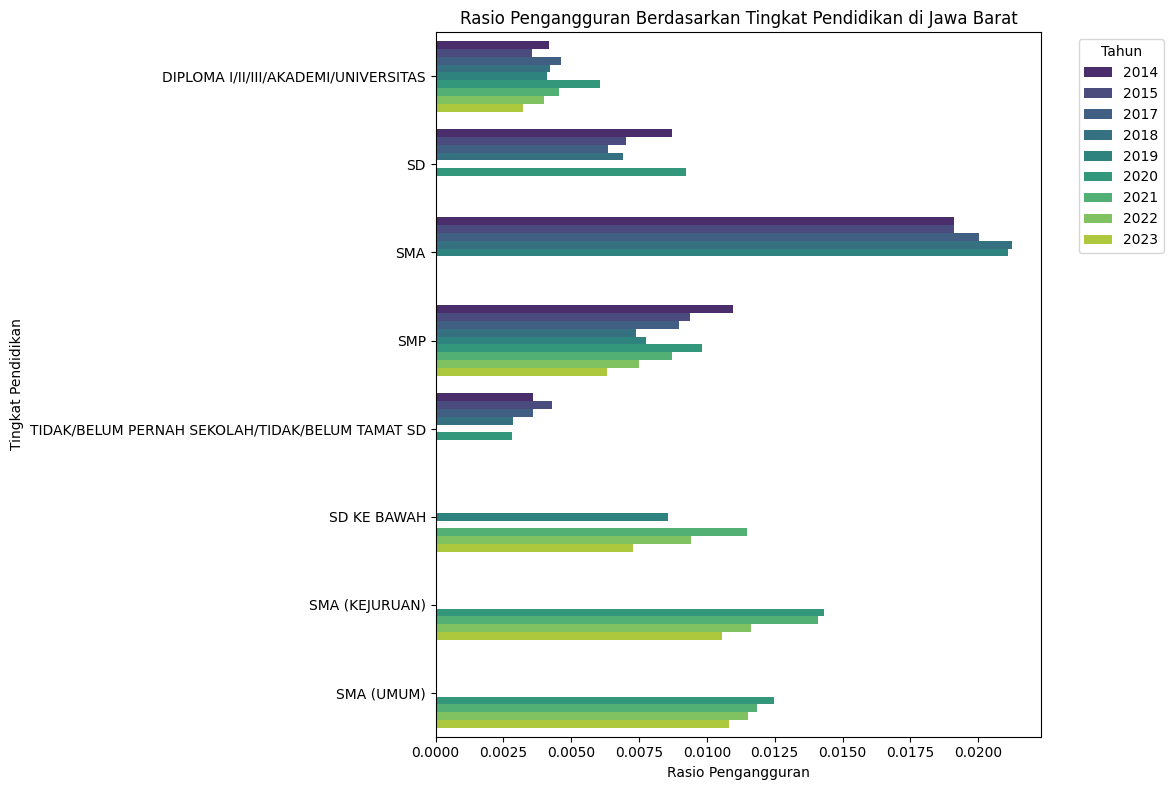

In [903]:
# Mengambil dataset yang relevan
jptp = datasets['JPTP']  # Jumlah pengangguran berdasarkan pendidikan
jpjk = datasets['JPJK']  # Jumlah penduduk berdasarkan jenis kelamin


# Hitung total jumlah penduduk (laki-laki dan perempuan) di setiap kabupaten/kota berdasarkan tahun
# Menggabungkan data laki-laki dan perempuan untuk mendapatkan total penduduk
total_penduduk_per_tahun = jpjk.groupby(['tahun'])['jumlah_penduduk'].sum().reset_index()
total_penduduk_per_tahun = total_penduduk_per_tahun.rename(columns={'jumlah_penduduk': 'total_penduduk'})

# menggabungkan total pengagguran untuk setiap jenis pekerjaan
total_pengangguran = jptp.groupby(['tahun', 'pendidikan'])['jumlah_pengangguran'].sum().reset_index()

# Gabungkan dataset JPTP dengan total jumlah penduduk untuk menghitung rasio pengangguran
merged_data = pd.merge(total_pengangguran, total_penduduk_per_tahun, on=['tahun'])

# Hitung rasio pengangguran untuk setiap tingkat pendidikan
merged_data['rasio_pengangguran'] = merged_data['jumlah_pengangguran'] / merged_data['total_penduduk']

# Plotting menggunakan barplot horizontal
plt.figure(figsize=(12, 8))
sb.barplot(x='rasio_pengangguran', y='pendidikan', hue='tahun', data=merged_data, palette='viridis', orient='h')
plt.title('Rasio Pengangguran Berdasarkan Tingkat Pendidikan di Jawa Barat')
plt.xlabel('Rasio Pengangguran')
plt.ylabel('Tingkat Pendidikan')
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **Penjelasan Grafik diatas:**

*   Tingkat pengangguran tertinggi di Jawa Barat pada periode ini berada di kalangan lulusan SMA, baik umum maupun kejuruan, menunjukkan perlunya peningkatan keterampilan atau pendidikan lanjut bagi lulusan SMA agar dapat lebih siap bersaing di pasar kerja.
*   Lulusan perguruan tinggi dan diploma memiliki tingkat pengangguran yang lebih rendah, mengindikasikan bahwa pendidikan yang lebih tinggi masih menjadi salah satu faktor penting dalam mengurangi risiko pengangguran.
* Dampak pandemi COVID-19 terhadap pengangguran tampak nyata pada tahun 2020 dan 2021, tetapi ada indikasi pemulihan di beberapa sektor pendidikan pada tahun 2023.


## **Tren Pengangguran Berdasarkan Daerah di Jawa Barat**

### 5 daerah teratas (berdasarkan rata rata persentase pengangguran di tahun 2014 - 2023)

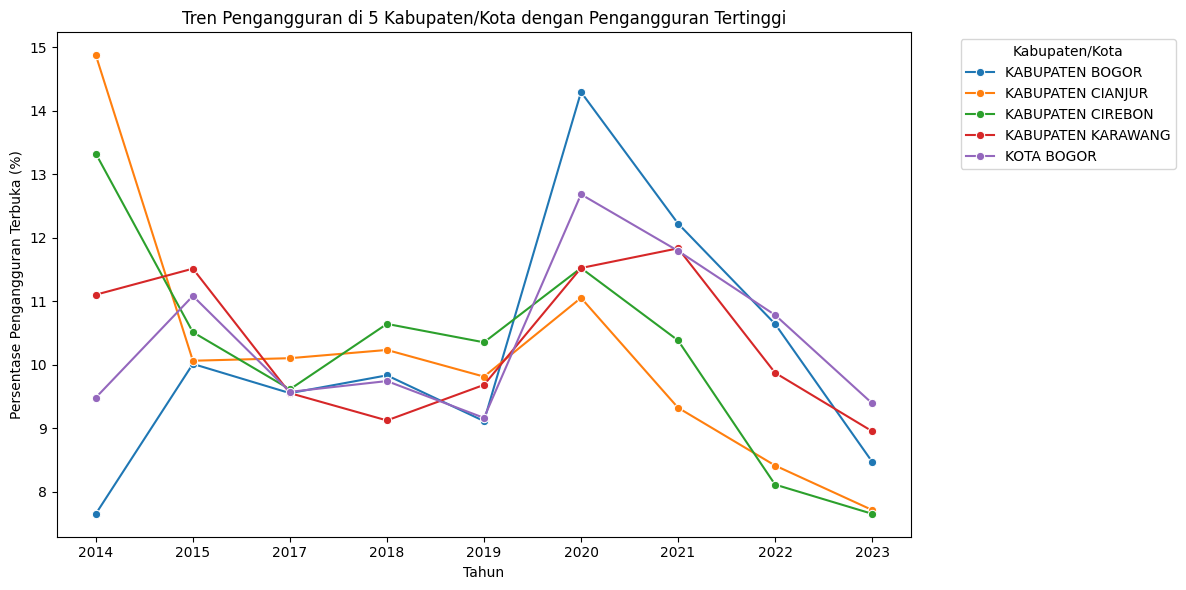

In [904]:
tpt = datasets['TPT']

avg_pengangguran = tpt.groupby('nama_kabupaten_kota')['persentase_penganggur_terbuka'].mean().reset_index()

# Pilih 5 kabupaten/kota dengan persentase pengangguran tertinggi
top5_kabupaten = avg_pengangguran.nlargest(5, 'persentase_penganggur_terbuka')['nama_kabupaten_kota']

# Filter data asli berdasarkan kabupaten/kota yang terpilih
top5_data = tpt[tpt['nama_kabupaten_kota'].isin(top5_kabupaten)]

# Plot tren pengangguran untuk 5 kabupaten/kota teratas
plt.figure(figsize=(12, 6))
sb.lineplot(data=top5_data, x='tahun', y='persentase_penganggur_terbuka', hue='nama_kabupaten_kota', marker='o')
plt.title('Tren Pengangguran di 5 Kabupaten/Kota dengan Pengangguran Tertinggi')
plt.xlabel('Tahun')
plt.ylabel('Persentase Pengangguran Terbuka (%)')
plt.legend(title='Kabupaten/Kota', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Pada line plot tersebut terlihat bahwa ada lonjakan yang tajam pada tahun 2020, dan penurunan yang signifikan di kabupaten Cianjur dan Cirebon pada tahun 2014

### 5 daerah terbawah (berdasarkan rata rata persentase pengangguran di tahun 2014 - 2023)

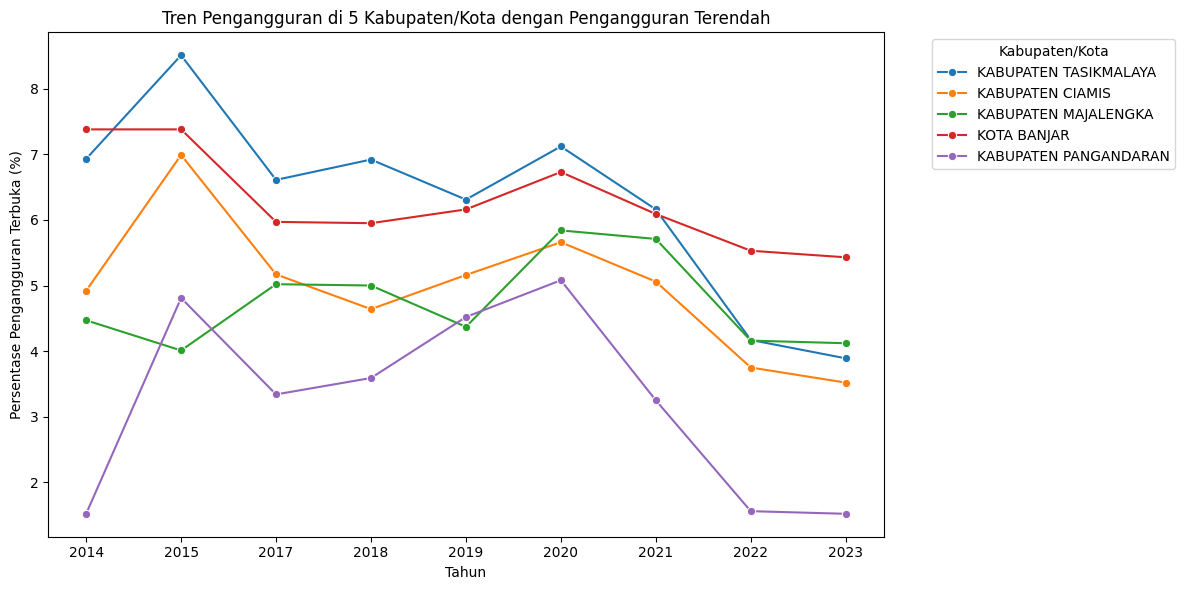

In [905]:
# Pilih 5 kabupaten/kota dengan persentase pengangguran terendah
bottom5_kabupaten = avg_pengangguran.nsmallest(5, 'persentase_penganggur_terbuka')['nama_kabupaten_kota']

# Filter data asli berdasarkan kabupaten/kota yang terpilih
bottom5_data = tpt[tpt['nama_kabupaten_kota'].isin(bottom5_kabupaten)]

# Plot tren pengangguran untuk 5 kabupaten/kota dengan pengangguran terendah
plt.figure(figsize=(12, 6))
sb.lineplot(data=bottom5_data, x='tahun', y='persentase_penganggur_terbuka', hue='nama_kabupaten_kota', marker='o')
plt.title('Tren Pengangguran di 5 Kabupaten/Kota dengan Pengangguran Terendah')
plt.xlabel('Tahun')
plt.ylabel('Persentase Pengangguran Terbuka (%)')
plt.legend(title='Kabupaten/Kota', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Pada Line plot ini, keseluruhan daerah mengalami tren yang relatif stabil dari 2014 - 2019, hanya ada fluktuasi kecil di beberapa daerah. Lalu pada tahun 2019 terlihat bahwa ada penurunan yang cukup signifikan terutama daerah Pangandaran

### **Kesimpulan**

*   Sebagian besar daerah mengalami tren yang relatif stabil dari tahun 2014 hingga 2019, meskipun ada fluktuasi kecil di beberapa daerah.
*   Pada tahun 2020, terdapat lonjakan tajam pada tingkat pengangguran di hampir seluruh kabupaten/kota, yang kemungkinan besar dipicu oleh pandemi COVID-19.
*   Setelah lonjakan tersebut, mulai terjadi penurunan bertahap di hampir semua daerah, terutama pada tahun.
*   Kabupaten Pangandaran menjadi daerah dengan Tingkat Pengangguran Terendah pada tahun 2023, dengan menunjukkan penurunan paling signifikan.

## **Tren Pengangguran Berdasarkan Jenis Kelamin**

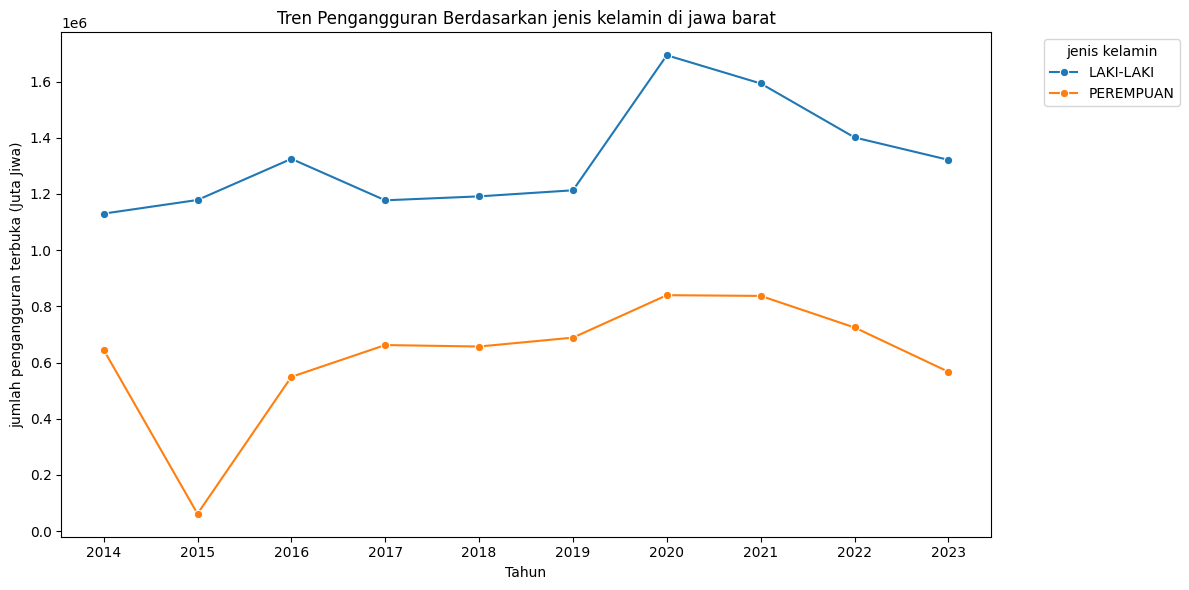

In [906]:
tpt = datasets['JPT']

# Plotting tren pengawngguran
plt.figure(figsize=(12, 6))
sb.lineplot(data=tpt, x='tahun', y='jumlah_pengangguran_terbuka', hue='jenis_kelamin', marker='o')
plt.title('Tren Pengangguran Berdasarkan jenis kelamin di jawa barat')
plt.xlabel('Tahun')
plt.ylabel('jumlah pengangguran terbuka (Juta Jiwa)')
plt.legend(title='jenis kelamin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Penjelasan Line Plot diatas:**
* Perbedaan Gender dalam Pengangguran: Pengangguran di kalangan laki-laki secara konsisten lebih tinggi daripada perempuan selama periode 2014-2023. Hal ini bisa jadi karena sektor-sektor pekerjaan yang lebih rentan terhadap pengangguran mungkin lebih banyak diisi oleh laki-laki, seperti sektor informal atau manufaktur.
* Dampak Pandemi, Baik laki-laki maupun perempuan mengalami peningkatan tajam dalam jumlah pengangguran pada tahun 2020, menunjukkan dampak langsung dari pandemi COVID-19 terhadap kesempatan kerja. Namun, jumlah pengangguran laki-laki lebih drastis dibandingkan perempuan, menunjukkan bahwa pandemi mungkin lebih mempengaruhi sektor-sektor yang didominasi oleh laki-laki.
* Pemulihan Pasca-pandemi, Setelah 2020, terlihat ada tren penurunan dalam pengangguran baik untuk laki-laki maupun perempuan, tetapi angka pengangguran perempuan cenderung menurun lebih cepat. Ini menunjukkan pemulihan yang lebih merata di kalangan perempuan pasca-pandemi.


## **Distribusi pengangguran berdasarkan golongan umur**

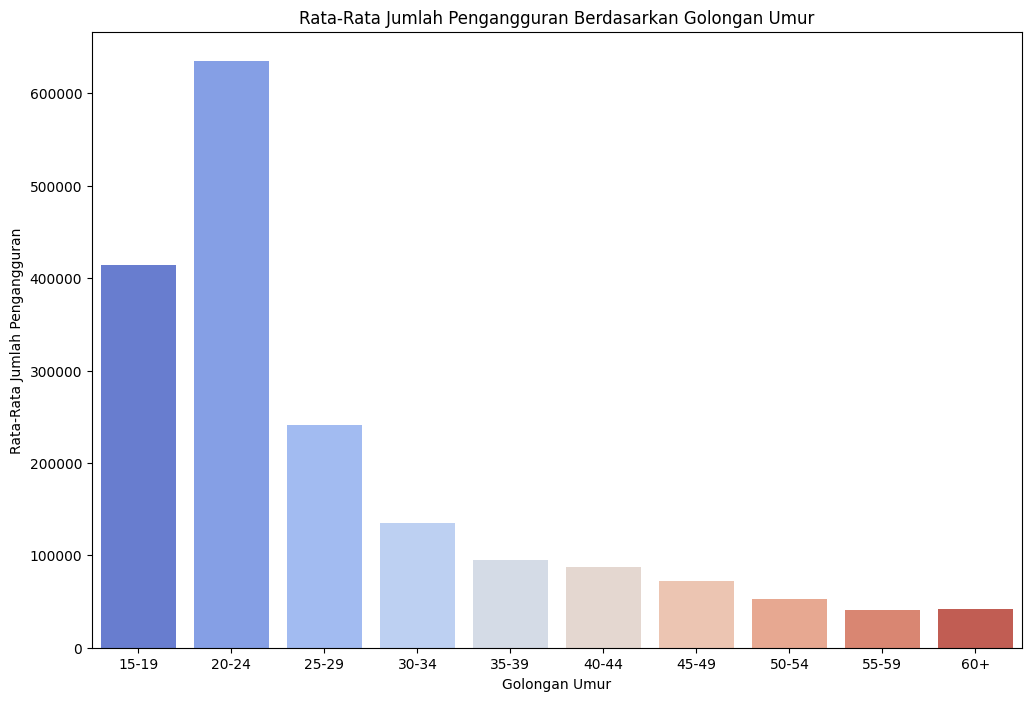

In [907]:
# Ambil data pengangguran berdasarkan golongan umur
umur_pengangguran = datasets['JPTU'][['golongan_umur', 'jumlah_pengangguran_terbuka']]

# Hitung rata-rata jumlah pengangguran untuk setiap golongan umur
rata_rata_pengangguran = umur_pengangguran.groupby('golongan_umur')['jumlah_pengangguran_terbuka'].mean().reset_index()

# Plot distribusi rata-rata pengangguran berdasarkan golongan umur
plt.figure(figsize=(12, 8))
sb.barplot(x='golongan_umur', y='jumlah_pengangguran_terbuka', data=rata_rata_pengangguran, palette='coolwarm')
plt.title('Rata-Rata Jumlah Pengangguran Berdasarkan Golongan Umur')
plt.xlabel('Golongan Umur')
plt.ylabel('Rata-Rata Jumlah Pengangguran')
plt.show()

Grafik ini menunjukkan rata-rata jumlah pengangguran berdasarkan golongan umur. Setiap bar di grafik menggambarkan rata-rata jumlah pengangguran dalam satuan ribuan di berbagai kelompok umur, dari usia 15-19 tahun hingga 60+ tahun.


### **Kesimpulan**
*   Kelompok usia muda (terutama usia 15-24 tahun) menghadapi tingkat pengangguran yang paling tinggi. Ini mungkin karena mereka adalah angkatan kerja baru yang sedang mencari pekerjaan pertama atau masih dalam tahap transisi dari pendidikan ke dunia kerja.
*   Kelompok usia lebih tua (di atas 40 tahun) menunjukkan penurunan jumlah pengangguran yang signifikan, yang mungkin menunjukkan bahwa mereka lebih stabil dalam pekerjaan atau mendekati usia pensiun.



## **Rata-Rata Jumlah Pengangguran di Tiap Kabupaten/Kota di Jawa Barat**

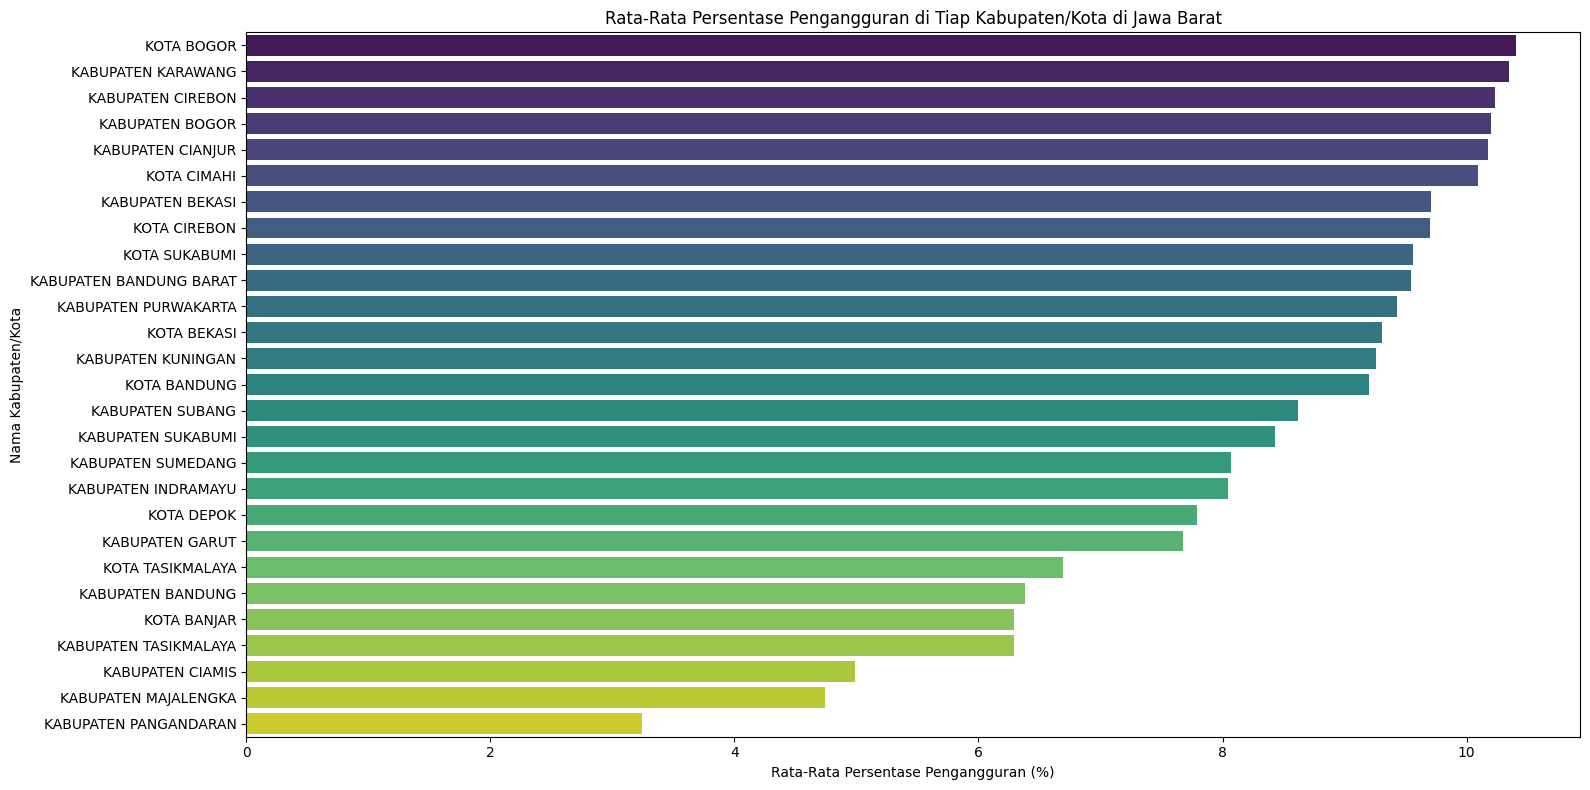

In [909]:

# Mengurutkan data berdasarkan persentase pengangguran dari yang tertinggi ke terendah
data = datasets['TPT'].groupby('nama_kabupaten_kota')['persentase_penganggur_terbuka'].mean().reset_index()
data_merged = data.sort_values(by='persentase_penganggur_terbuka', ascending=False)

# Buat plot bar horizontal untuk menampilkan rata-rata persentase pengangguran yang sudah diurutkan
plt.figure(figsize=(16, 8))  # Mengatur ukuran plot
sb.barplot(
    x='persentase_penganggur_terbuka',       # Sumbu x: persentase pengangguran
    y='nama_kabupaten_kota',           # Sumbu y: Nama Kabupaten/Kota
    data=data_merged,       # Data yang digunakan
    palette='viridis'                  # Skema warna untuk visualisasi
)

# Mengatur tampilan plot
plt.title('Rata-Rata Persentase Pengangguran di Tiap Kabupaten/Kota di Jawa Barat')  # Judul plot
plt.xlabel('Rata-Rata Persentase Pengangguran (%)')                                   # Label sumbu x
plt.ylabel('Nama Kabupaten/Kota')                                                      # Label sumbu y

# Menampilkan plot
plt.tight_layout()  # Memperbaiki layout agar tidak terpotong
plt.show()


### **Penjelasan Grafik diatas:**

Plot di atas menunjukkan perbandingan rata-rata persentase pengangguran di setiap kabupaten/kota di Jawa Barat. Sumbu vertikal mewakili nama kabupaten/kota, sedangkan sumbu horizontal menunjukkan persentase pengangguran (%).

Dari visualisasi ini, terlihat beberapa pola penting:

* Tingkat Pengangguran Tertinggi: Kota Bogor memiliki rata-rata persentase pengangguran tertinggi, diikuti oleh Kabupaten Karawang dan Kabupaten Cirebon. Ini menunjukkan adanya tantangan ekonomi yang lebih signifikan di daerah-daerah ini.

* Pengangguran Moderat: Kabupaten Bekasi, Kota Cimahi, dan Kabupaten Cianjur berada di tengah distribusi, dengan persentase pengangguran yang tidak terlalu tinggi tetapi juga tidak rendah.

* Tingkat Pengangguran Terendah: Kabupaten Pangandaran memiliki persentase pengangguran terendah, diikuti oleh Kabupaten Majalengka dan Kabupaten Ciamis. Daerah-daerah ini mungkin memiliki kondisi ekonomi yang lebih stabil atau peluang kerja yang lebih baik.

* Warna yang bergradasi dari ungu ke kuning semakin menekankan perbedaan tingkat pengangguran antarwilayah, membuat perbandingan menjadi lebih mudah diidentifikasi. Plot ini secara keseluruhan menggambarkan kondisi pengangguran di berbagai daerah di Jawa Barat, membantu untuk memahami area yang membutuhkan intervensi atau pengembangan ekonomi lebih lanjut.

## **Tren Pengangguran dan Kemiskinan di Jawa Barat periode 2014 - 2023**

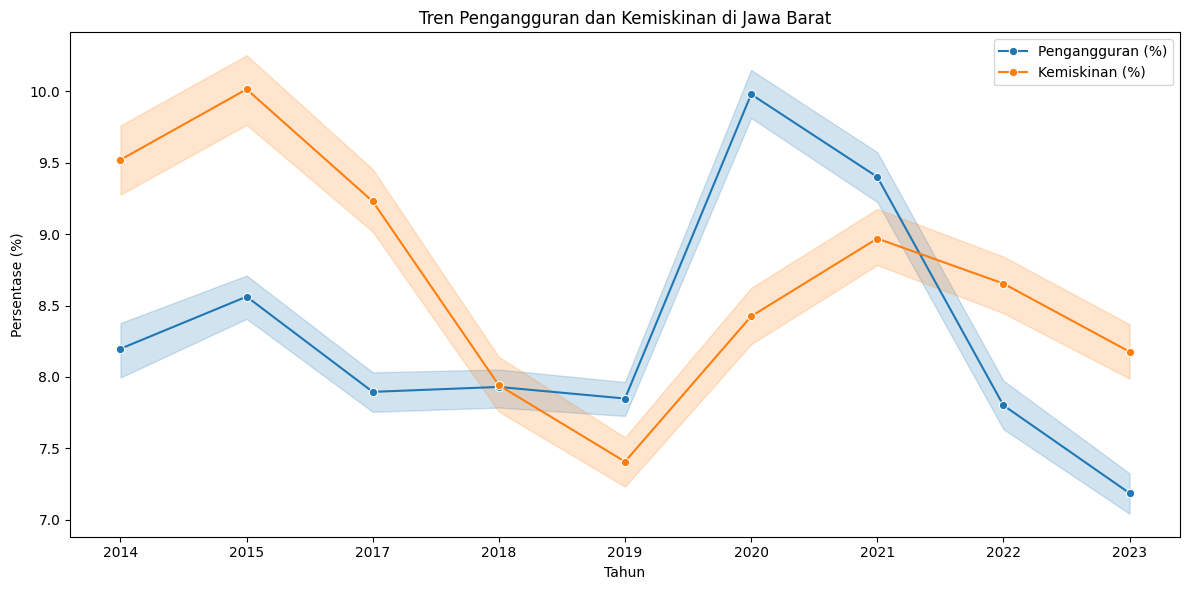

In [910]:

ppm = datasets['PPM']
tpt = datasets['TPT']

# Menggabungkan dataset PPM dengan TPT
merged_data = pd.merge(tpt[['nama_kabupaten_kota', 'tahun', 'persentase_penganggur_terbuka']], ppm[['nama_kabupaten_kota', 'persentase_penduduk_miskin', 'tahun']], left_on=['tahun'], right_on=['tahun'])

# Plotting
plt.figure(figsize=(12, 6))
sb.lineplot(data=merged_data, x='tahun', y='persentase_penganggur_terbuka', label='Pengangguran (%)', marker='o')
sb.lineplot(data=merged_data, x='tahun', y='persentase_penduduk_miskin', label='Kemiskinan (%)', marker='o')
plt.title('Tren Pengangguran dan Kemiskinan di Jawa Barat')
plt.xlabel('Tahun')
plt.ylabel('Persentase (%)')
plt.legend()
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan tren pengangguran dan kemiskinan di Provinsi Jawa Barat dari tahun 2014 hingga 2023, ada penurunan yang cukup signifikan dari tahun 2015 - 2019, dan kenaukan tajam pada 2019 diikuti penurunan lagi hingga 2023.

### **Kesimpulan**

* Kenaikan Pengangguran dan Kemiskinan pada 2020: Lonjakan signifikan baik dalam pengangguran maupun kemiskinan pada tahun 2020 mungkin terkait dengan dampak pandemi COVID-19, yang mempengaruhi perekonomian, menyebabkan banyak kehilangan pekerjaan dan peningkatan jumlah penduduk yang jatuh di bawah garis kemiskinan.

* Pemulihan Setelah 2020: Mulai dari 2021 hingga 2023, kita melihat tren pemulihan. Pengangguran dan kemiskinan sama-sama menunjukkan penurunan setelah puncaknya pada 2020. Namun, pengangguran tampaknya pulih lebih cepat dibanding kemiskinan, yang masih relatif tinggi pada 2023 meskipun menurun.

* Ketergantungan Kemiskinan terhadap Pengangguran: Keterkaitan antara pengangguran dan kemiskinan cukup jelas, terutama pada tahun-tahun kritis seperti 2020, di mana peningkatan pengangguran berkontribusi pada peningkatan kemiskinan. Namun, kemiskinan tampaknya lebih lambat pulih setelah peningkatan besar pada 2020, yang menunjukkan bahwa pemulihan ekonomi mungkin tidak segera merata bagi semua kelompok masyarakat.


Pengangguran dan kemiskinan di Jawa Barat cenderung berkorelasi, terutama selama periode krisis (seperti pandemi). Meskipun ada tanda-tanda pemulihan setelah 2020, kemiskinan mungkin membutuhkan waktu lebih lama untuk kembali ke tingkat yang lebih rendah, meskipun pengangguran sudah menurun lebih signifikan pada 2023.

## **Distribusi Jumlah Penduduk berdasarkan Jenis Pekerjaan di Jawa Barat**

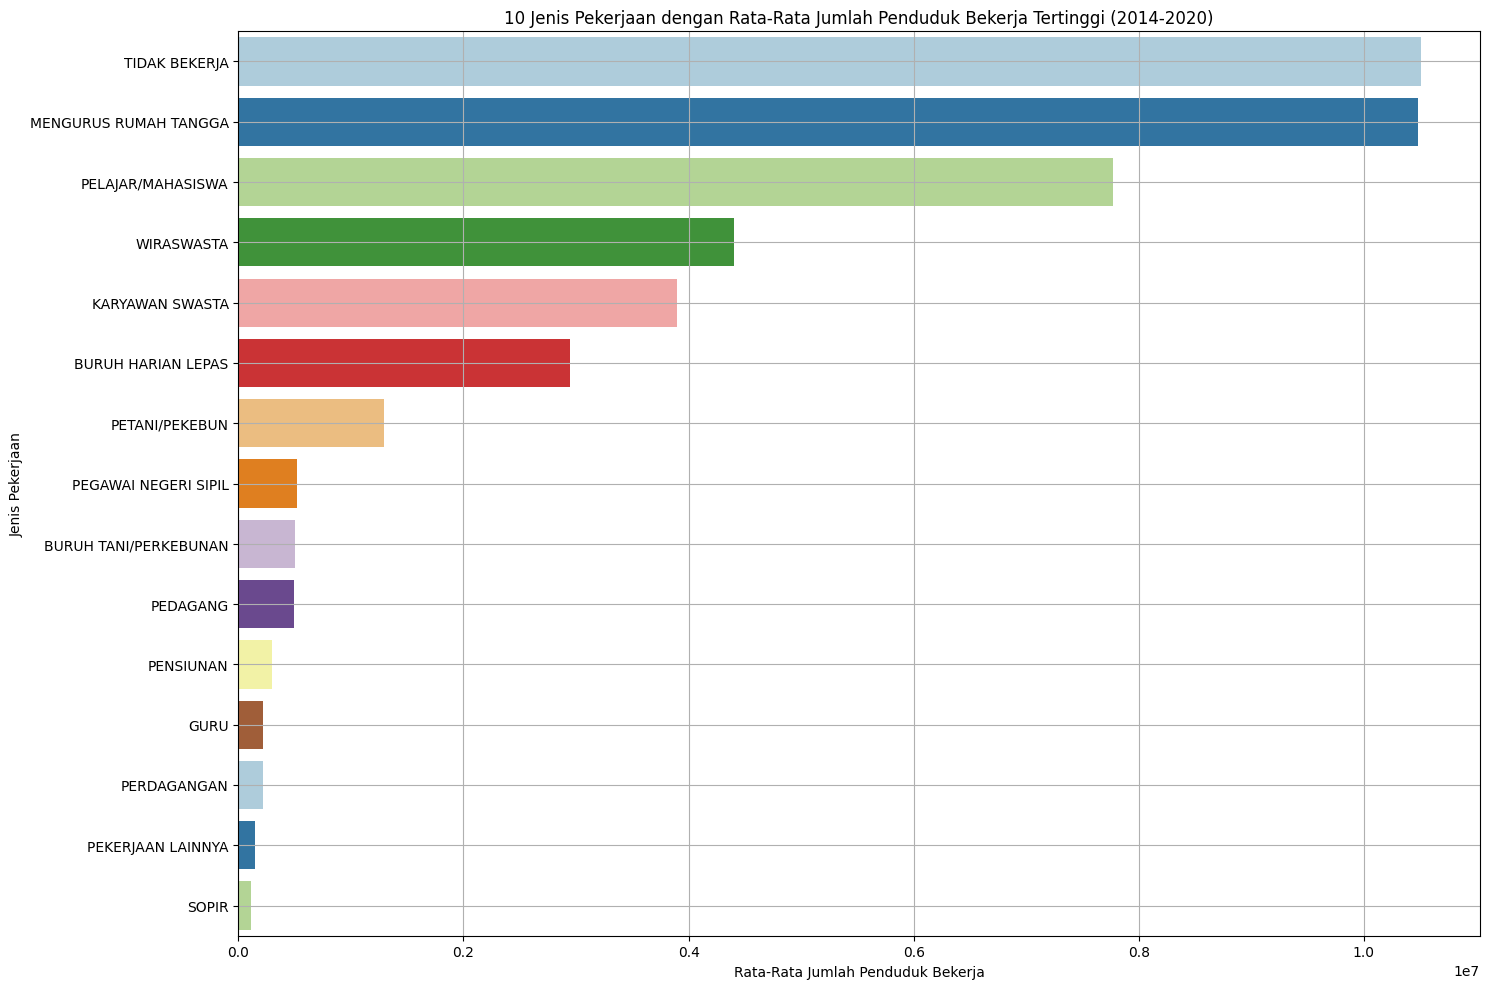

In [911]:
# Load dataset
jpp = datasets['JPP']  # Jumlah Penduduk Berdasarkan Pekerjaan

jpp = jpp[jpp['tahun'] != 2023]

# 1. Hitung rata-rata jumlah penduduk yang bekerja berdasarkan jenis pekerjaan
rata_rata_bekerja = jpp.groupby('jenis_pekerjaan')['jumlah_penduduk_bekerja'].mean().reset_index()

# 2. Sorting data berdasarkan rata-rata jumlah penduduk yang bekerja dari yang paling banyak
rata_rata_bekerja = rata_rata_bekerja.sort_values(by='jumlah_penduduk_bekerja', ascending=False)

# Memilih 10 data tertinggi
top_10_pekerjaan = rata_rata_bekerja.head(15)

# Membuat palet warna kontras
colors = sb.color_palette("Paired", n_colors=15)

# Plot
plt.figure(figsize=(15, 10))  # Mengatur ukuran plot
sb.barplot(data=top_10_pekerjaan, y='jenis_pekerjaan', x='jumlah_penduduk_bekerja', palette=colors)
plt.title('10 Jenis Pekerjaan dengan Rata-Rata Jumlah Penduduk Bekerja Tertinggi (2014-2020)')
plt.xlabel('Rata-Rata Jumlah Penduduk Bekerja')
plt.ylabel('Jenis Pekerjaan')
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot tersebut menunjukkan 10 jenis pekerjaan dengan rata-rata jumlah penduduk bekerja tertinggi pada periode 2014-2020:

* Tidak Bekerja dan Mengurus Rumah Tangga memiliki jumlah tertinggi, mengindikasikan banyak orang yang tidak memiliki pekerjaan formal atau bekerja di rumah.

* Pelajar/Mahasiswa menempati posisi tinggi, menunjukkan banyaknya populasi dalam pendidikan.

* Wiraswasta dan Karyawan Swasta juga signifikan, menunjukkan peran penting sektor swasta dan kewirausahaan.

* Buruh Harian Lepas cukup tinggi, menunjukkan ketergantungan pada pekerjaan informal yang tidak tetap.

* Petani/Pekebun dan Pegawai Negeri Sipil lebih rendah, menunjukkan sektor pertanian dan pemerintah memiliki kontribusi yang stabil namun tidak dominan.

Kesimpulan: Sebagian besar penduduk terdistribusi di sektor non-formal, pendidikan, dan kewirausahaan, mencerminkan struktur ekonomi dan preferensi pekerjaan di masyarakat.

## **Perbandingan Jumlah Pengangguran dan Penduduk Usia Produktif berdasarkan Jenis Kelamin**

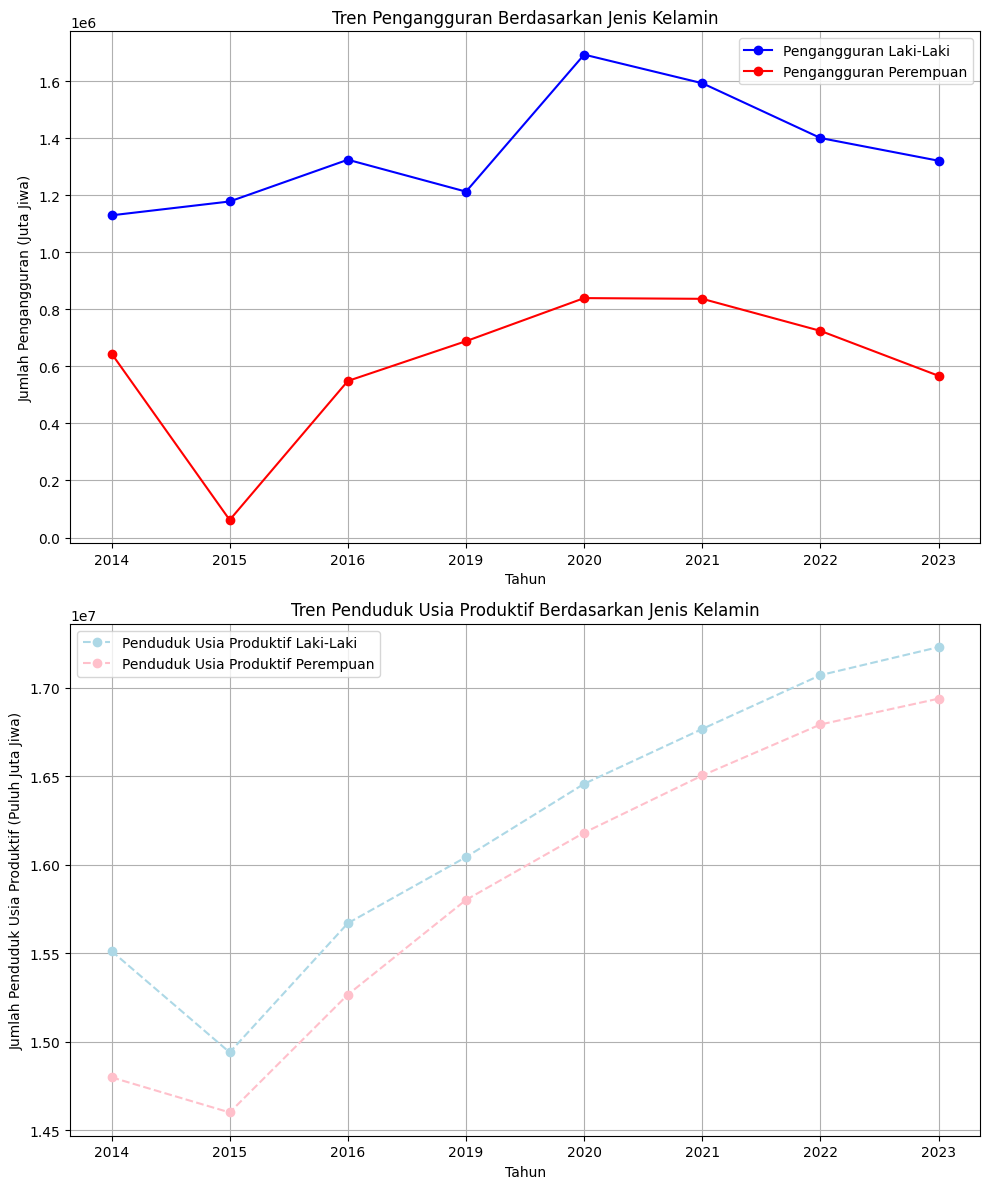

In [912]:
# Load dataset pengangguran dan penduduk usia produktif
jpup = datasets['JPUP']  # Data penduduk usia produktif
jpt = datasets['JPT']    # Data pengangguran

# 1. Hitung jumlah pengangguran per tahun berdasarkan jenis kelamin
pengangguran_laki = jpt[jpt['jenis_kelamin'] == 'LAKI-LAKI'].groupby('tahun')['jumlah_pengangguran_terbuka'].sum()
pengangguran_perempuan = jpt[jpt['jenis_kelamin'] == 'PEREMPUAN'].groupby('tahun')['jumlah_pengangguran_terbuka'].sum()

# 2. Hitung jumlah penduduk usia produktif per tahun berdasarkan jenis kelamin
penduduk_laki = jpup[jpup['jenis_kelamin'] == 'LAKI-LAKI'].groupby('tahun')['jumlah_penduduk_usia_produktif'].sum()
penduduk_perempuan = jpup[jpup['jenis_kelamin'] == 'PEREMPUAN'].groupby('tahun')['jumlah_penduduk_usia_produktif'].sum()

# 3. Gabungkan kedua dataset berdasarkan tahun untuk masing-masing jenis kelamin
unemployment_vs_population_laki = pd.DataFrame({
    'pengangguran_laki': pengangguran_laki,
    'penduduk_usia_produktif_laki': penduduk_laki
}).dropna()  # Menghapus data yang kosong

unemployment_vs_population_perempuan = pd.DataFrame({
    'pengangguran_perempuan': pengangguran_perempuan,
    'penduduk_usia_produktif_perempuan': penduduk_perempuan
}).dropna()  # Menghapus data yang kosong

# 4. Membuat Subplot dengan 2 plot terpisah: 1 untuk Pengangguran, 1 untuk Penduduk Usia Produktif
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Membuat 2 subplots (baris x kolom)

# Plot pertama: Tren Pengangguran
axes[0].plot(unemployment_vs_population_laki.index, unemployment_vs_population_laki['pengangguran_laki'], marker='o', label='Pengangguran Laki-Laki', color='blue')
axes[0].plot(unemployment_vs_population_perempuan.index, unemployment_vs_population_perempuan['pengangguran_perempuan'], marker='o', label='Pengangguran Perempuan', color='red')
axes[0].set_title('Tren Pengangguran Berdasarkan Jenis Kelamin')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Jumlah Pengangguran (Juta Jiwa)')
axes[0].legend()
axes[0].grid(True)

# Plot kedua: Tren Penduduk Usia Produktif
axes[1].plot(unemployment_vs_population_laki.index, unemployment_vs_population_laki['penduduk_usia_produktif_laki'], marker='o', label='Penduduk Usia Produktif Laki-Laki', linestyle='--', color='lightblue')
axes[1].plot(unemployment_vs_population_perempuan.index, unemployment_vs_population_perempuan['penduduk_usia_produktif_perempuan'], marker='o', label='Penduduk Usia Produktif Perempuan', linestyle='--', color='pink')
axes[1].set_title('Tren Penduduk Usia Produktif Berdasarkan Jenis Kelamin')
axes[1].set_xlabel('Tahun')
axes[1].set_ylabel('Jumlah Penduduk Usia Produktif (Puluh Juta Jiwa)')
axes[1].legend()
axes[1].grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

### **Grafik 1: Tren Pengangguran Berdasarkan Jenis Kelamin**

* **Laki-laki**: Grafik ini menunjukkan bahwa jumlah pengangguran laki-laki lebih tinggi dibandingkan perempuan selama periode 2014 hingga 2023. Pada tahun 2020, terjadi lonjakan jumlah pengangguran laki-laki yang sangat signifikan, dan setelah itu, jumlahnya sedikit menurun namun tetap tinggi.
* **Perempuan**: Jumlah pengangguran perempuan cenderung lebih rendah dibandingkan laki-laki. Jumlahnya meningkat dari 2015 hingga 2021, dengan puncak pada 2020-2021, kemudian mengalami penurunan pada tahun 2022-2023.

**Kesimpulan**: Tingkat pengangguran laki-laki lebih fluktuatif dan cenderung lebih tinggi, terutama di tahun 2020, kemungkinan sebagai akibat dari krisis global (misalnya pandemi) yang memengaruhi pasar kerja. Sedangkan pengangguran perempuan juga meningkat pada periode yang sama, namun skalanya tidak sebesar laki-laki.

### **Grafik 2: Tren Penduduk Usia Produktif Berdasarkan Jenis Kelamin**

* **Laki-laki**: Penduduk usia produktif laki-laki secara konsisten meningkat dari tahun ke tahun, dengan kenaikan tajam terutama mulai tahun 2015. Pada tahun 2023, jumlah penduduk usia produktif laki-laki mencapai lebih dari 17 juta jiwa.
* **Perempuan**: Sama halnya dengan laki-laki, penduduk usia produktif perempuan juga meningkat dengan tren serupa, meskipun jumlahnya lebih sedikit dibandingkan laki-laki di setiap tahunnya.

**Kesimpulan**: Jumlah penduduk usia produktif baik laki-laki maupun perempuan mengalami peningkatan yang stabil setiap tahunnya. Hal ini menunjukkan adanya pertumbuhan jumlah individu yang berpotensi masuk ke dalam angkatan kerja. Namun, meski jumlah penduduk usia produktif terus meningkat, jumlah pengangguran terutama di kalangan laki-laki tetap tinggi, yang mengindikasikan tantangan dalam menyediakan lapangan pekerjaan yang memadai bagi penduduk usia produktif.

### **Perbandingan**

* Jumlah pengangguran menunjukkan pola yang lebih fluktuatif dengan puncak yang signifikan terutama di tahun 2020, yang kemungkinan besar terkait dengan kondisi ekonomi dan sosial pada saat itu.
* Sebaliknya, jumlah penduduk usia produktif menunjukkan tren pertumbuhan yang stabil, tanpa adanya penurunan besar meskipun terjadi peningkatan pengangguran pada periode tertentu.

Secara keseluruhan, meskipun jumlah penduduk usia produktif terus meningkat, tren pengangguran menunjukkan adanya kesenjangan antara ketersediaan tenaga kerja dan peluang kerja yang tersedia, terutama bagi laki-laki.

# **Perbandingan persentase angkatan kerja dan persentase partisipasi angkatan kerja**

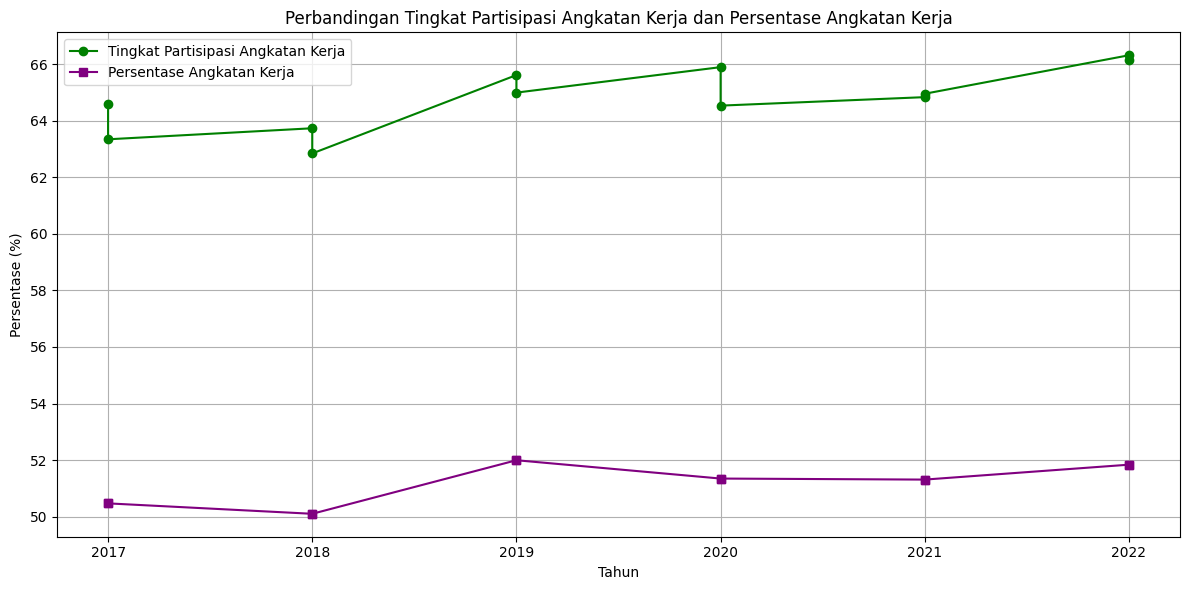

In [913]:
# Ubah tipe data kolom 'tahun' pada kedua dataframe menjadi int
ppak.loc[:, 'tahun'] = ppak['tahun'].astype(int)
persentase_ak['tahun'] = persentase_ak['tahun'].astype(int)

# Gabungkan dataframe berdasarkan kolom 'tahun'
merged_data = pd.merge(ppak, persentase_ak, on='tahun')

# Lanjutkan dengan kode berikutnya
merged_data.set_index('tahun', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(merged_data.index, merged_data['tingkat_partisipasi_angkatan_kerja'], marker='o', label='Tingkat Partisipasi Angkatan Kerja', color='green')
ax.plot(merged_data.index, merged_data['persentase_angkatan_kerja'], marker='s', label='Persentase Angkatan Kerja', color='purple')

# Menambahkan judul dan label
ax.set_title('Perbandingan Tingkat Partisipasi Angkatan Kerja dan Persentase Angkatan Kerja')
ax.set_xlabel('Tahun')
ax.set_ylabel('Persentase (%)')
ax.legend()
ax.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()



Dari plot perbandingan Tingkat Partisipasi Angkatan Kerja (TPAK) dan Persentase Angkatan Kerja (PAK) tahun 2017-2022:

* TPAK menunjukkan tren naik perlahan, stabil di sekitar 64-66%, mengindikasikan jumlah orang yang aktif dalam angkatan kerja.
PAK tetap lebih rendah, stabil di sekitar 50-52%, menunjukkan proporsi orang yang benar-benar bekerja.

* Kesenjangan TPAK dan PAK menunjukkan ada populasi pengangguran di angkatan kerja.


Kesimpulan: TPAK yang naik menunjukkan lebih banyak orang masuk angkatan kerja, tetapi PAK yang stabil mengindikasikan tantangan dalam menciptakan lapangan pekerjaan untuk mengakomodasi pertumbuhan ini.

## **Heatmap korelasi antara penganggur terbuka, penduduk miskin, dan penduduk bekerja**

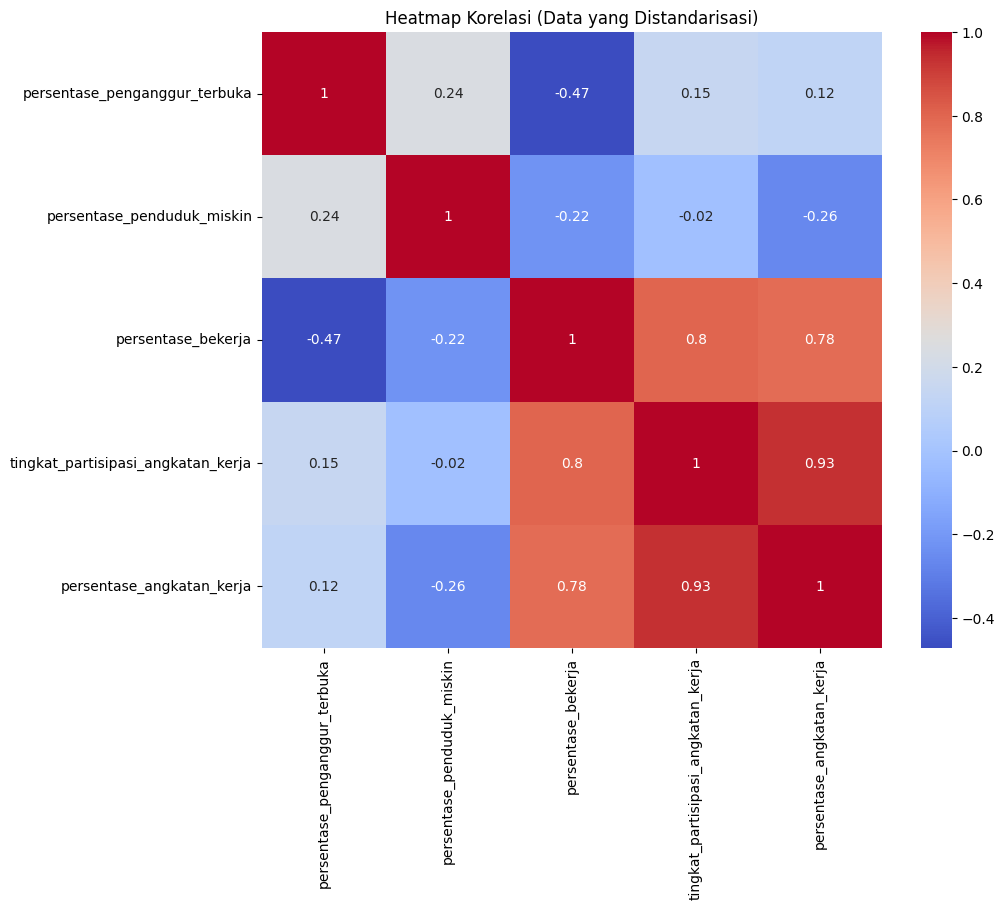

In [914]:
# grouping terlebih dahulu, rata ratakan untuk se jawa barat
tpt = datasets['TPT'].groupby('tahun')['persentase_penganggur_terbuka'].mean().reset_index()
ppm = datasets['PPM'].groupby('tahun')['persentase_penduduk_miskin'].mean().reset_index()
ppb = Persentase_penduduk_bekerja.groupby('tahun')['persentase_bekerja'].mean().reset_index()
ppak = datasets['PPAK'].groupby('tahun')['tingkat_partisipasi_angkatan_kerja'].mean().reset_index()

# Convert 'tahun' column to integer type
tpt['tahun'] = tpt['tahun'].astype(int)
ppm['tahun'] = ppm['tahun'].astype(int)
ppb['tahun'] = ppb['tahun'].astype(int)
ppak['tahun'] = ppak['tahun'].astype(int)

# Ambil hanya beberapa field yang akan digunakan
tpt = tpt[['persentase_penganggur_terbuka', 'tahun']]
ppm = ppm[['persentase_penduduk_miskin', 'tahun']]
ppb = ppb[['persentase_bekerja', 'tahun']]
ppak = ppak[['tingkat_partisipasi_angkatan_kerja', 'tahun']]
jak = persentase_ak[['persentase_angkatan_kerja', 'tahun']]

# 1. Gabungkan dataset berdasarkan tahun
merged_data = pd.merge(tpt, ppm, on='tahun')
merged_data = pd.merge(merged_data, ppb, on='tahun')
merged_data = pd.merge(merged_data, ppak, on='tahun')
merged_data = pd.merge(merged_data, jak, on='tahun')


# 2. Ambil hanya kolom yang akan dianalisis
columns_to_analyze = ['persentase_penganggur_terbuka', 'persentase_penduduk_miskin', 'persentase_bekerja', 'tingkat_partisipasi_angkatan_kerja', 'persentase_angkatan_kerja']

# 3. Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(merged_data[columns_to_analyze])

# 4. Konversi hasil standarisasi kembali menjadi DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=columns_to_analyze)

# 5. Hitung korelasi pada data yang sudah distandarisasi
correlation_matrix = standardized_df.corr()

# 6. Plot heatmap korelasi dari data yang sudah distandarisasi
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi (Data yang Distandarisasi)')
plt.show()

### **Penjelasan Heatmap diatas**
* Korelasi Negatif antara Persentase Penganggur Terbuka dan Persentase Bekerja (-0.47):

  Kemungkinan penyebabnya adalah ketika pengangguran meningkat, secara alami persentase penduduk yang bekerja menurun. Hal ini dapat disebabkan oleh faktor-faktor ekonomi makro seperti resesi, kurangnya lapangan kerja, atau ketidaksesuaian keterampilan tenaga kerja dengan kebutuhan pasar.

* Korelasi Positif Tinggi antara Tingkat Partisipasi Angkatan Kerja dan Persentase Angkatan Kerja (0.93):

  Alasan korelasi tinggi ini adalah karena tingkat partisipasi angkatan kerja dan persentase angkatan kerja secara definisi saling terkait erat. Ketika lebih banyak orang ikut dalam angkatan kerja (baik bekerja maupun mencari kerja), persentasenya terhadap populasi total meningkat.

* Korelasi Positif antara Persentase Bekerja dengan Partisipasi Angkatan Kerja (0.8) dan Angkatan Kerja (0.78):

  Hal ini menunjukkan bahwa semakin banyak orang yang bekerja, semakin tinggi partisipasi dalam angkatan kerja. Penyebabnya bisa termasuk pertumbuhan ekonomi yang menciptakan lebih banyak pekerjaan, program pemerintah yang mendorong partisipasi kerja, atau peningkatan pendidikan yang mempersiapkan lebih banyak orang untuk masuk ke dunia kerja.

* Korelasi Rendah Persentase Penduduk Miskin dengan Variabel Lain (0.24 dengan Pengangguran, -0.26 dengan Angkatan Kerja):

  Korelasi rendah ini dapat disebabkan oleh faktor lain yang memengaruhi tingkat kemiskinan, seperti ketimpangan pendapatan, akses ke pendidikan, dan layanan sosial. Walaupun pengangguran dapat berkontribusi terhadap kemiskinan, hubungan ini sering kali dipengaruhi oleh banyak variabel lain yang tidak termasuk dalam heatmap ini.

* Alasan Warna dan Skala:

  Warna merah tua untuk korelasi positif menunjukkan variabel yang bergerak searah (misalnya, peningkatan satu variabel diikuti peningkatan variabel lain). Warna biru tua menunjukkan variabel yang bergerak berlawanan arah. Korelasi rendah (ditunjukkan dengan warna abu-abu) berarti hubungan antar variabel tersebut lemah atau tidak signifikan.


Secara keseluruhan, korelasi dalam heatmap ini mencerminkan interaksi yang kompleks antara faktor tenaga kerja dan ekonomi. Korelasi positif yang tinggi biasanya menandakan variabel yang saling mempengaruhi secara langsung, sedangkan korelasi negatif atau rendah menunjukkan hubungan yang lebih kompleks atau adanya pengaruh faktor luar lainnya.

# **Referensi**

* Persentase pekerja di pangandaran tahun 2014 https://databoks.katadata.co.id/ketenagakerjaan/statistik/c2990f37e8804d3/jumlah-penduduk-bekerja-di-kabupaten-pangandaran-270-39-ribu-dan-angka-pengangguran-1-52-
* Jumlah penduduk jawa barat 2023 https://dashboard.jabarprov.go.id/id/topic/kependudukan
* Jumlah pengangguran jawa barat 2023 https://jabar.bps.go.id/id/pressrelease/2023/05/05/1091/tingkat-pengangguran-terbuka--tpt--di-jawa-barat-sebesar-7-89-persen.html
* Untuk dataset, hampir semuanya kami akses dari link berikut https://opendata.jabarprov.go.id/id
kami akses pada 2 oktober 2024 sore hari sekitar pukul 3.00 PM